In [1]:
import onnx
import winmltools
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras import backend
import matplotlib.pyplot as plt

C:\Users\mcb\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
max_batch_size = 32
number_of_classes = 10
number_of_epocs = 10

In [3]:
input_shape= None

image_row_size = 28
image_column_size = 28

(train_features, train_label), (test_features, test_label) = mnist.load_data()

train_features = train_features.astype('float32')
train_features/=255
test_features = test_features.astype('float32')
test_features/=255

if backend.image_data_format() == 'channels_first':
    train_features = train_features.reshape(train_features.shape[0], 1, image_row_size, image_column_size)
    test_features = test_features.reshape(test_features.shape[0], 1, image_row_size, image_column_size)
    input_shape = (1, image_row_size, image_column_size)
else:
    train_features = train_features.reshape(train_features.shape[0], image_row_size, image_column_size, 1)
    test_features =test_features.reshape(test_features.shape[0], image_row_size, image_column_size, 1)
    input_shape = (image_row_size, image_column_size,1)

train_label = keras.utils.to_categorical(train_label, number_of_classes)
test_label = keras.utils.to_categorical(test_label, number_of_classes)

In [4]:
model = Sequential()
model.add(Conv2D(16, strides= (1,1), padding= 'valid', kernel_size=(3, 3),
             activation='relu',
             input_shape=input_shape))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(number_of_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.


In [5]:
model_history = model.fit(train_features, train_label,
                  batch_size=max_batch_size,
                  epochs=number_of_epocs,
                  verbose=1,
                  validation_data=(train_features, train_label))
score = model.evaluate(test_features, test_label, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 11s 186us/step - loss: 0.1130 - acc: 0.9642 - val_loss: 0.0470 - val_acc: 0.9847
Epoch 2/10
60000/60000 [==============================] - 9s 157us/step - loss: 0.0347 - acc: 0.9893 - val_loss: 0.0206 - val_acc: 0.9936
Epoch 3/10
60000/60000 [==============================] - 10s 165us/step - loss: 0.0236 - acc: 0.9927 - val_loss: 0.0294 - val_acc: 0.9905
Epoch 4/10
60000/60000 [==============================] - 10s 163us/step - loss: 0.0170 - acc: 0.9947 - val_loss: 0.0140 - val_acc: 0.9956
Epoch 5/10
60000/60000 [==============================] - 10s 163us/step - loss: 0.0126 - acc: 0.9961 - val_loss: 0.0192 - val_acc: 0.9942
Epoch 6/10
60000/60000 [==============================] - 10s 163us/step - loss: 0.0103 - acc: 0.9969 - val_loss: 0.0061 - val_acc: 0.9984
Epoch 7/10
60000/60000 [==============================] - 10s 162us/s

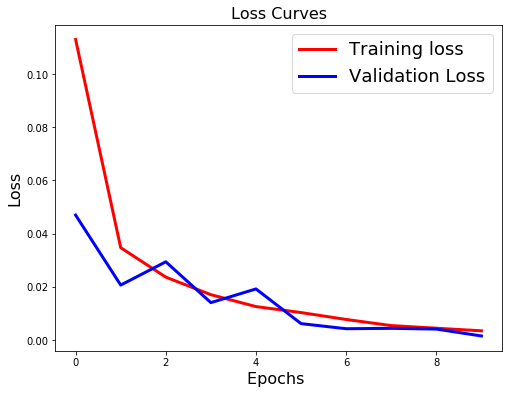

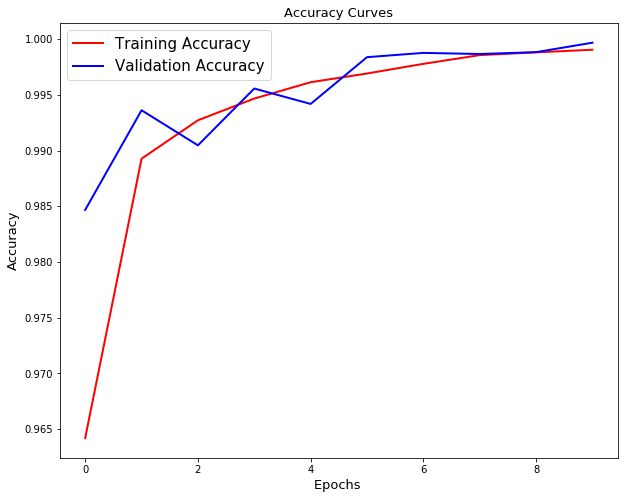

In [6]:
plt.figure(figsize=[8, 6])
plt.plot(model_history.history['loss'], 'r', linewidth=3.0)
plt.plot(model_history.history['val_loss'], 'b', linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'], fontsize=18)
plt.xlabel('Epochs ', fontsize=16)
plt.ylabel('Loss', fontsize=16)
plt.title('Loss Curves', fontsize=16)
plt.show()

# Plot the Accuracy Curves
plt.figure(figsize=[10, 8])
plt.plot(model_history.history['acc'], 'r', linewidth=2.0)
plt.plot(model_history.history['val_acc'], 'b', linewidth=2.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'], fontsize=15)
plt.xlabel('Epochs ', fontsize=13)
plt.ylabel('Accuracy', fontsize=13)
plt.title('Accuracy Curves', fontsize=13)
plt.show()

In [22]:
convert_model = winmltools.convert_keras(model, target_opset=8, name="cropper")

Instructions for updating:
Use tf.compat.v1.graph_util.remove_training_nodes
using tensorflow=1.13.1, onnx=1.4.1, opset=8, tfonnx=1.5.0/82f805


In [23]:
winmltools.save_model(convert_model, "mnist.onnx")